<a href="https://colab.research.google.com/github/ainurafifah00/recommender_system/blob/master/book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation System using Keras
A recommendation system seeks to predict the rating or preference a user would give to an item given his old item ratings or preferences. Recommendation systems are used by pretty much every major company in order to enhance the quality of their services.  
Content:  
1. [Loading in data](#1)  
2. [Creating dot product model](#2)
3. [Creating Neural Network](#3)
4. [Visualizing Embeddings](#4)
5. [Making Recommendations](#5)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


<a id="1"></a> 
## Loading in data

In [2]:
#dataset = pd.read_csv('../input/ratings.csv')
url = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv"

dataset = pd.read_csv(url)

In [3]:
dataset.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [4]:
dataset.shape

(5976479, 3)

In [5]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [6]:
train.head()

,user_id,book_id,rating
1701724,10714,7164,3
5361971,48091,2213,3
3243372,9809,5769,4
1808828,25191,86,5
5142988,25441,4884,3


In [7]:
test.head()

,user_id,book_id,rating
3623535,42562,2757,3
3985638,43232,134,4
2983642,37244,1463,5
5812251,53366,71,2
2208852,29634,3339,4


In [8]:
n_users = len(dataset.user_id.unique())
n_users

53424

In [9]:
n_books = len(dataset.book_id.unique())
n_books

10000

<a id="2"></a> 
## Creating dot product model
Most recommendation systems are build using a simple dot product as shown below but newer ones are now implementing a neural network instead of the simple dot product.

In [10]:
# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

Epoch 1/5
4781183/4781183 [==============================] - 346s 72us/step - loss: 3.5582
Epoch 2/5
4781183/4781183 [==============================] - 342s 72us/step - loss: 0.8226
Epoch 3/5
4781183/4781183 [==============================] - 338s 71us/step - loss: 0.8035
Epoch 4/5
4781183/4781183 [==============================] - 338s 71us/step - loss: 0.7796
Epoch 5/5
4781183/4781183 [==============================] - 338s 71us/step - loss: 0.7603


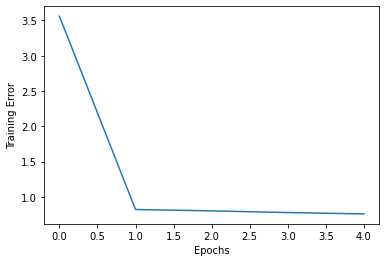

In [11]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [12]:
model.evaluate([test.user_id, test.book_id], test.rating)

1195296/1195296 [==============================] - 42s 35us/step


0.7681112481137597

In [13]:
predictions = model.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[3.7596426] 3
[3.3382032] 4
[5.1408625] 5
[2.3848028] 2
[3.7688231] 4
[3.936163] 4
[4.7321115] 4
[3.629539] 4
[4.287485] 5
[2.8535717] 4


[None, None, None, None, None, None, None, None, None, None]

<a id="3"></a> 
## Creating Neural Network
Neural Networks proved there effectivness for almost every machine learning problem as of now and they also perform exceptionally well for recommendation systems.

In [14]:
from keras.layers import Concatenate

# creating book embedding path
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_books+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/5
4781183/4781183 [==============================] - 467s 98us/step - loss: 0.7743
Epoch 2/5
4781183/4781183 [==============================] - 474s 99us/step - loss: 0.7237
Epoch 3/5
4781183/4781183 [==============================] - 469s 98us/step - loss: 0.7021
Epoch 4/5
4781183/4781183 [==============================] - 468s 98us/step - loss: 0.6819
Epoch 5/5
4781183/4781183 [==============================] - 468s 98us/step - loss: 0.6691


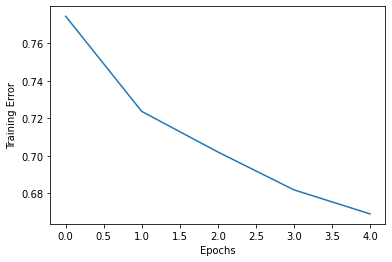

In [15]:
from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.user_id, train.book_id], train.rating, epochs=5, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [16]:
model2.evaluate([test.user_id, test.book_id], test.rating)

1195296/1195296 [==============================] - 44s 37us/step


0.6955929932238647

In [17]:
predictions = model2.predict([test.user_id.head(10), test.book_id.head(10)])

[print(predictions[i], test.rating.iloc[i]) for i in range(0,10)]

[3.1913834] 3
[3.270221] 4
[4.3148365] 5
[2.577224] 2
[3.4198654] 4
[3.6769416] 4
[4.1560373] 4
[4.1473894] 4
[4.281001] 5
[3.6870344] 4


[None, None, None, None, None, None, None, None, None, None]

<a id="4"></a> 
## Visualizing Embeddings
Embeddings are weights that are learned to represent some specific variable like books and user in our case and therefore we can not only use them to get good results on our problem but also to extract inside about our data.

In [18]:
# Extract embeddings
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [19]:
book_em_weights[:5]

array([[ 0.02134928, -0.02706414, -0.00956858,  0.01662779, -0.02893038],
       [ 0.8709158 ,  0.6274885 ,  2.052807  , -1.9850048 ,  0.67375255],
       [-0.30213183,  0.80680275,  2.478465  , -2.1889868 ,  0.2155234 ],
       [ 1.5721536 ,  0.9239824 ,  1.743887  , -1.7339752 ,  2.6162782 ],
       [-0.81021595, -0.00673714,  2.7591686 , -1.8932228 , -0.9690773 ]],
      dtype=float32)

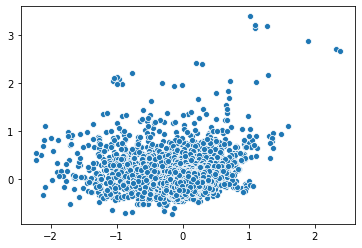

In [20]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [21]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

1.0

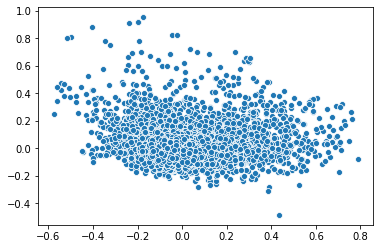

In [22]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tnse_results = tsne.fit_transform(book_em_weights)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10001 samples in 0.007s...
[t-SNE] Computed neighbors for 10001 samples in 0.504s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10001
[t-SNE] Computed conditional probabilities for sample 2000 / 10001
[t-SNE] Computed conditional probabilities for sample 3000 / 10001
[t-SNE] Computed conditional probabilities for sample 4000 / 10001
[t-SNE] Computed conditional probabilities for sample 5000 / 10001
[t-SNE] Computed conditional probabilities for sample 6000 / 10001
[t-SNE] Computed conditional probabilities for sample 7000 / 10001
[t-SNE] Computed conditional probabilities for sample 8000 / 10001
[t-SNE] Computed conditional probabilities for sample 9000 / 10001
[t-SNE] Computed conditional probabilities for sample 10000 / 10001
[t-SNE] Computed conditional probabilities for sample 10001 / 10001
[t-SNE] Mean sigma: 0.019444
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.938324
[t-SNE] KL

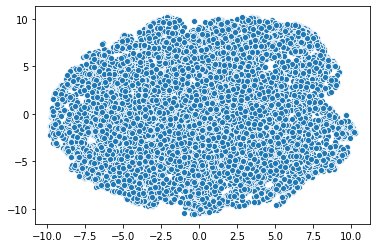

In [24]:
sns.scatterplot(x=tnse_results[:,0], y=tnse_results[:,1])

<a id="5"></a> 
## Making Recommendations

In [25]:
# Creating dataset for making recommendations for the first user
book_data = np.array(list(set(dataset.book_id)))
book_data[:5]

array([1, 2, 3, 4, 5])

In [26]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [27]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([8945, 9996, 8662, 9565, 3627])

In [28]:
# print predicted scores
predictions[recommended_book_ids]

array([4.9119406, 4.883702 , 4.8790994, 4.8519073, 4.8167562],
      dtype=float32)

In [29]:
url_book = "https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv"
#books = pd.read_csv('../input/books.csv')
books = pd.read_csv(url)
books.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [30]:
books[books['book_id'].isin(recommended_book_ids)]

,user_id,book_id,rating
3143,112,8662,5
7637,337,8662,4
10935,497,8662,5
16181,486,8662,4
20422,623,8662,4
...,...,...,...
5949438,45871,9996,4
5950064,13985,8662,3
5962676,13856,8662,4
5969821,53103,9996,5
